In [11]:
import os
import datetime
import matplotlib.pyplot as plt
key_api = os.getenv("BINANCE_KEY")
secret_api = os.getenv("BINANCE_PASS")

from binance.client import Client
client = Client(key_api, secret_api)

In [2]:
import pandas as pd
import numpy as np

def get_data(symbol, start):
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1m', start))
    frame = frame.iloc[:,:5]
    frame.columns = ["Time", "Open", "High", "Low", "Close"]
    frame.set_index("Time", inplace=True)
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    frame = frame['Close']
    frame.name = symbol
    return frame


In [4]:
df = get_data("BTCUSDT", str(pd.Timestamp.utcnow() - datetime.timedelta(minutes=15)))
df.head()

Time
2023-08-07 09:50:00    29086.01
2023-08-07 09:51:00    29086.01
2023-08-07 09:52:00    29086.01
2023-08-07 09:53:00    29086.01
2023-08-07 09:54:00    29086.01
Name: BTCUSDT, dtype: float64

In [6]:
sym = ["ETHUSDT", "BTCUSDT", "DOGEUSDT", "API3USDT", "ADAUSDT", "ATAUSDT", "YGGUSDT", "GTCUSDT"]

In [7]:
dfs = []
now = pd.Timestamp.utcnow() 
lookback = 30
back = now - datetime.timedelta(minutes=lookback)
for s in sym:
    dfs.append(get_data(s,str(back)))

In [8]:
all_df = pd.concat(dfs, axis = 1)
all_df.head()

,ETHUSDT,BTCUSDT,DOGEUSDT,API3USDT,ADAUSDT,ATAUSDT,YGGUSDT,GTCUSDT
Time,,,,,,,,
2023-08-07 09:38:00,1836.12,29092.34,0.07483,1.205,0.2934,0.0859,0.5602,1.098
2023-08-07 09:39:00,1836.13,29091.75,0.07481,1.204,0.2934,0.0859,0.5590,1.099
2023-08-07 09:40:00,1835.38,29086.83,0.07473,1.201,0.2932,0.0858,0.5617,1.094
2023-08-07 09:41:00,1835.21,29087.50,0.07470,1.197,0.2931,0.0858,0.5639,1.094
2023-08-07 09:42:00,1835.20,29080.90,0.07471,1.197,0.2930,0.0857,0.5619,1.092


In [9]:
cum_ret = (all_df.pct_change() + 1).cumprod()
cum_ret.head()

,ETHUSDT,BTCUSDT,DOGEUSDT,API3USDT,ADAUSDT,ATAUSDT,YGGUSDT,GTCUSDT
Time,,,,,,,,
2023-08-07 09:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-07 09:39:00,1.000005,0.999980,0.999733,0.999170,1.000000,1.000000,0.997858,1.000911
2023-08-07 09:40:00,0.999597,0.999811,0.998664,0.996680,0.999318,0.998836,1.002678,0.996357
2023-08-07 09:41:00,0.999504,0.999834,0.998263,0.993361,0.998978,0.998836,1.006605,0.996357
2023-08-07 09:42:00,0.999499,0.999607,0.998396,0.993361,0.998637,0.997672,1.003035,0.994536


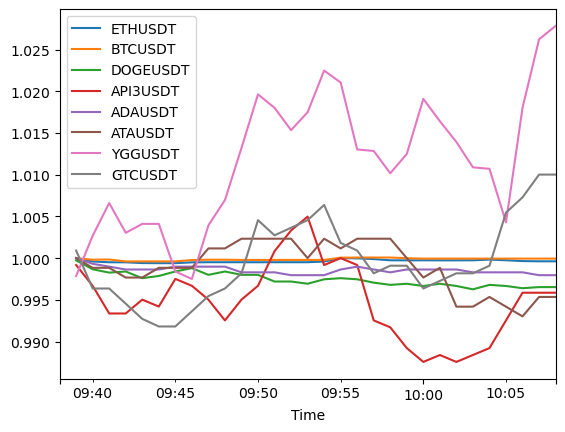

In [13]:
((cum_ret)).plot()
plt.show()